# Business Understanding

1. 10 USD / hour for casual user
2. 3 USD / hour for registred user
3. 14% taxes
4. 2000 USD / year maintainance

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Loading

In [ ]:
df = pd.read_csv('bikes (1).csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0,8,32,40
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0,5,27,32
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0,3,10,13
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1


# EDA

In [ ]:
def profit(work_hour):
  cash_profit = work_hour['casual']*10 + work_hour['registered']*3
  taxes = cash_profit-(0.14 * cash_profit)
  maintainance_per_hour = 2000 / (365*24)
  net_profit = taxes - maintainance_per_hour
  return net_profit

In [ ]:
df['profit'] = df.apply(profit, axis = 1)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10672 non-null  object 
 2   holiday             10030 non-null  float64
 3   workingday          9388 non-null   float64
 4   weather             8746 non-null   object 
 5   temp                8104 non-null   float64
 6   humidity            7462 non-null   float64
 7   windspeed           6820 non-null   float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
 11  profit              10886 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 1020.7+ KB


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10672 non-null  object        
 2   holiday             10030 non-null  float64       
 3   workingday          9388 non-null   float64       
 4   weather             8746 non-null   object        
 5   temp                8104 non-null   float64       
 6   humidity            7462 non-null   float64       
 7   windspeed           6820 non-null   float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(3), object(2)
memory usage: 1020.7+ KB


In [ ]:
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,month,hour,weekday
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689,1,0,Saturday
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689,1,1,Saturday
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689,1,2,Saturday
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689,1,3,Saturday
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689,12,19,Wednesday
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689,12,20,Wednesday
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689,12,21,Wednesday
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689,12,22,Wednesday


In [ ]:
def map_hours(x):
  if x in range(0,13):
    return 'Morning'
  elif x in range(13,19):
    return 'Afternoon'
  elif x in range(19,23):
    return 'Evening'
  else:
    return 'Night'

df['period'] = df['hour'].apply(map_hours)
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,month,hour,weekday,period
0,2011-01-01 00:00:00,Spring,0.0,0.0,Clear,9.84,81.0,NaN,3,13,16,59.111689,1,0,Saturday,Morning
1,2011-01-01 01:00:00,Spring,0.0,0.0,NaN,9.02,80.0,0.0000,8,32,40,151.131689,1,1,Saturday,Morning
2,2011-01-01 02:00:00,Spring,0.0,0.0,Clear,9.02,NaN,0.0000,5,27,32,112.431689,1,2,Saturday,Morning
3,2011-01-01 03:00:00,Spring,0.0,0.0,Clear,9.84,75.0,0.0000,3,10,13,51.371689,1,3,Saturday,Morning
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689,1,4,Saturday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0.0,1.0,Clear,15.58,50.0,26.0027,7,329,336,908.791689,12,19,Wednesday,Evening
10882,2012-12-19 20:00:00,Winter,0.0,1.0,NaN,14.76,NaN,NaN,10,231,241,681.751689,12,20,Wednesday,Evening
10883,2012-12-19 21:00:00,NaN,0.0,1.0,Clear,13.94,61.0,15.0013,4,164,168,457.291689,12,21,Wednesday,Evening
10884,2012-12-19 22:00:00,Winter,NaN,1.0,Clear,13.94,NaN,6.0032,12,117,129,404.831689,12,22,Wednesday,Evening


In [ ]:
df.describe()

,datetime,holiday,workingday,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,month,hour
count,10886,10030.000000,9388.000000,8104.000000,7462.000000,6820.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,0.029113,0.678206,20.317665,61.790673,12.708806,36.021955,155.552177,191.574132,710.885118,6.521495,11.541613
min,2011-01-01 00:00:00,0.000000,0.000000,0.820000,0.000000,0.000000,0.000000,0.000000,1.000000,2.351689,1.000000,0.000000
25%,2011-07-02 07:15:00,0.000000,0.000000,13.940000,47.000000,7.001500,4.000000,36.000000,42.000000,142.531689,4.000000,6.000000
50%,2012-01-01 20:30:00,0.000000,1.000000,20.500000,62.000000,12.998000,17.000000,118.000000,145.000000,500.291689,7.000000,12.000000
75%,2012-07-01 12:45:00,0.000000,1.000000,26.240000,77.000000,16.997900,49.000000,222.000000,284.000000,1051.551689,10.000000,18.000000
max,2012-12-19 23:00:00,1.000000,1.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000,4126.911689,12.000000,23.000000
std,NaN,0.168131,0.467189,7.818568,19.262084,8.131154,49.960477,151.039033,181.144454,709.202461,3.444373,6.915838


In [ ]:
df[df['profit'] == df['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,month,hour,weekday,period
9415,2012-09-15 16:00:00,Fall,0.0,0.0,Mist,NaN,36.0,15.0013,350,433,783,4126.911689,9,16,Saturday,Afternoon


In [ ]:
df[df['profit'] == df['profit'].min()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,month,hour,weekday,period
4,2011-01-01 04:00:00,NaN,0.0,0.0,Clear,NaN,75.0,NaN,0,1,1,2.351689,1,4,Saturday,Morning
5,2011-01-01 05:00:00,NaN,0.0,NaN,Mist,9.84,NaN,6.0032,0,1,1,2.351689,1,5,Saturday,Morning
30,2011-01-02 07:00:00,Spring,0.0,0.0,NaN,16.40,NaN,12.9980,0,1,1,2.351689,1,7,Sunday,Morning
49,2011-01-03 04:00:00,Spring,0.0,NaN,Clear,6.56,NaN,26.0027,0,1,1,2.351689,1,4,Monday,Morning
71,2011-01-04 02:00:00,Spring,0.0,1.0,NaN,5.74,63.0,8.9981,0,1,1,2.351689,1,2,Tuesday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,2012-04-05 04:00:00,Summer,0.0,1.0,Clear,15.58,43.0,19.0012,0,1,1,2.351689,4,4,Thursday,Morning
7051,2012-04-12 04:00:00,Summer,0.0,1.0,Clear,NaN,61.0,15.0013,0,1,1,2.351689,4,4,Thursday,Morning
7433,2012-05-09 02:00:00,Summer,0.0,1.0,Rainy,NaN,NaN,30.0026,0,1,1,2.351689,5,2,Wednesday,Morning
10288,2012-11-14 02:00:00,Winter,0.0,1.0,Clear,9.84,60.0,19.9995,0,1,1,2.351689,11,2,Wednesday,Morning


In [ ]:
df.groupby('period').describe()['profit']

,count,mean,min,25%,50%,75%,max,std
period,,,,,,,,
Afternoon,2736.0,1287.588685,30.731689,652.511689,1106.591689,1795.451689,4126.911689,814.508255
Evening,1824.0,754.653192,15.251689,360.756689,661.111689,1026.826689,2848.091689,499.534603
Morning,5870.0,458.554879,2.351689,49.651689,225.951689,696.371689,4095.951689,558.407186
Night,456.0,323.789891,15.251689,172.201689,271.101689,452.346689,1043.811689,208.882169


In [ ]:
df.groupby('weekday').describe()['profit']

,count,mean,min,25%,50%,75%,max,std
weekday,,,,,,,,
Friday,1529.0,696.841905,2.351689,172.631689,585.431689,1048.111689,3272.931689,613.628926
Monday,1551.0,670.640445,2.351689,140.381689,520.931689,1026.181689,3165.431689,626.448152
Saturday,1584.0,890.190932,2.351689,161.881689,524.801689,1411.676689,4126.911689,929.497164
Sunday,1579.0,809.787117,2.351689,159.301689,442.671689,1312.991689,3697.771689,827.622847
Thursday,1553.0,653.318528,2.351689,137.371689,519.211689,982.751689,3096.631689,612.017117
Tuesday,1539.0,627.594042,2.351689,120.601689,477.931689,956.091689,3513.731689,602.149032
Wednesday,1551.0,621.452992,2.351689,120.601689,452.991689,933.731689,3072.551689,625.409320


In [ ]:
df.groupby('holiday').describe()['profit']

,count,mean,min,25%,50%,75%,max,std
holiday,,,,,,,,
0.0,9738.0,709.165095,2.351689,140.811689,499.861689,1048.111689,4126.911689,708.871793
1.0,292.0,768.944498,4.931689,142.316689,502.011689,1243.331689,2848.091689,759.497973


In [ ]:
df.groupby('weather').describe()['profit']

,count,mean,min,25%,50%,75%,max,std
weather,,,,,,,,
Clear,5793.0,766.381153,2.351689,158.871689,564.791689,1140.131689,4056.391689,742.228818
Mist,2259.0,649.365589,2.351689,136.511689,471.051689,983.611689,4126.911689,634.182907
Rainy,693.0,411.097404,2.351689,74.591689,226.811689,533.831689,2930.651689,507.688309
Snowy,1.0,459.011689,459.011689,459.011689,459.011689,459.011689,459.011689,NaN


<ipython-input-126-58d7f7fd32dd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'weather', y= 'profit', data= df, palette= 'rainbow')


<Axes: xlabel='weather', ylabel='profit'>

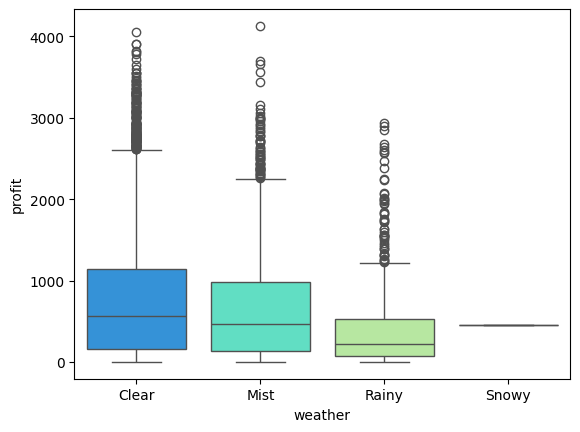

In [ ]:
sns.boxplot(x= 'weather', y= 'profit', data= df, palette= 'rainbow')

In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'casual', 'registered', 'rented_bikes_count',
       'profit', 'month', 'hour', 'weekday', 'period'],
      dtype='object')

In [ ]:
cat_feat = ['season' , 'weather']

for col in cat_feat:
  print(f'categorical feature name: {col}')
  print(df[col].unique())
  print('-'*50)

categorical feature name: season
['Spring' nan 'Summer' 'Fall' 'Winter']
--------------------------------------------------
categorical feature name: weather
['Clear' nan 'Mist' 'Rainy' 'Snowy']
--------------------------------------------------


# Dealing with Missing Values

In [ ]:
df.isna().sum()

,0
datetime,0
season,214
holiday,856
workingday,1498
weather,2140
temp,2782
humidity,3424
windspeed,4066
casual,0
registered,0


In [ ]:
df = df[['season', 'weather', 'temp', 'humidity', 'month', 'weekday', 'hour', 'period', 'profit']]
df

,season,weather,temp,humidity,month,weekday,hour,period,profit
0,Spring,Clear,9.84,81.0,1,Saturday,0,Morning,59.111689
1,Spring,NaN,9.02,80.0,1,Saturday,1,Morning,151.131689
2,Spring,Clear,9.02,NaN,1,Saturday,2,Morning,112.431689
3,Spring,Clear,9.84,75.0,1,Saturday,3,Morning,51.371689
4,NaN,Clear,NaN,75.0,1,Saturday,4,Morning,2.351689
...,...,...,...,...,...,...,...,...,...
10881,Winter,Clear,15.58,50.0,12,Wednesday,19,Evening,908.791689
10882,Winter,NaN,14.76,NaN,12,Wednesday,20,Evening,681.751689
10883,NaN,Clear,13.94,61.0,12,Wednesday,21,Evening,457.291689
10884,Winter,Clear,13.94,NaN,12,Wednesday,22,Evening,404.831689


In [ ]:
df.isna().sum()

,0
season,214
weather,2140
temp,2782
humidity,3424
month,0
weekday,0
hour,0
period,0
profit,0


In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [ ]:
df[['season', 'weather']] = imputer.fit_transform(df[['season', 'weather']])

<ipython-input-133-d3d48d7fabfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['season', 'weather']] = imputer.fit_transform(df[['season', 'weather']])


In [ ]:
df.isna().sum()

,0
season,0
weather,0
temp,2782
humidity,3424
month,0
weekday,0
hour,0
period,0
profit,0


In [ ]:
imputer = KNNImputer()

In [ ]:
df[['temp','humidity']] = imputer.fit_transform(df[['temp','humidity']])

<ipython-input-136-ede50d59679e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['temp','humidity']] = imputer.fit_transform(df[['temp','humidity']])


In [ ]:
df.isna().sum()

,0
season,0
weather,0
temp,0
humidity,0
month,0
weekday,0
hour,0
period,0
profit,0


In [ ]:
df

,season,weather,temp,humidity,month,weekday,hour,period,profit
0,Spring,Clear,9.84,81.0,1,Saturday,0,Morning,59.111689
1,Spring,Clear,9.02,80.0,1,Saturday,1,Morning,151.131689
2,Spring,Clear,9.02,59.8,1,Saturday,2,Morning,112.431689
3,Spring,Clear,9.84,75.0,1,Saturday,3,Morning,51.371689
4,Winter,Clear,13.94,75.0,1,Saturday,4,Morning,2.351689
...,...,...,...,...,...,...,...,...,...
10881,Winter,Clear,15.58,50.0,12,Wednesday,19,Evening,908.791689
10882,Winter,Clear,14.76,60.4,12,Wednesday,20,Evening,681.751689
10883,Winter,Clear,13.94,61.0,12,Wednesday,21,Evening,457.291689
10884,Winter,Clear,13.94,74.2,12,Wednesday,22,Evening,404.831689


# Detect Outliers

In [ ]:
!pip install datasist

In [ ]:
from datasist.structdata import detect_outliers

In [ ]:
idx = detect_outliers(df, 0, ['temp' , 'humidity'])
df.drop(idx, inplace = True)
df

<ipython-input-141-a8279106a0a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(idx, inplace = True)


,season,weather,temp,humidity,month,weekday,hour,period,profit
0,Spring,Clear,9.84,81.0,1,Saturday,0,Morning,59.111689
1,Spring,Clear,9.02,80.0,1,Saturday,1,Morning,151.131689
2,Spring,Clear,9.02,59.8,1,Saturday,2,Morning,112.431689
3,Spring,Clear,9.84,75.0,1,Saturday,3,Morning,51.371689
4,Winter,Clear,13.94,75.0,1,Saturday,4,Morning,2.351689
...,...,...,...,...,...,...,...,...,...
10881,Winter,Clear,15.58,50.0,12,Wednesday,19,Evening,908.791689
10882,Winter,Clear,14.76,60.4,12,Wednesday,20,Evening,681.751689
10883,Winter,Clear,13.94,61.0,12,Wednesday,21,Evening,457.291689
10884,Winter,Clear,13.94,74.2,12,Wednesday,22,Evening,404.831689


In [ ]:
df = pd.get_dummies(df , columns = ['season' , 'weather'  , 'weekday' , 'period'] , drop_first = True)
df

,temp,humidity,month,hour,profit,season_Spring,season_Summer,season_Winter,weather_Mist,weather_Rainy,weather_Snowy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,period_Evening,period_Morning,period_Night
0,9.84,81.0,1,0,59.111689,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,9.02,80.0,1,1,151.131689,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,9.02,59.8,1,2,112.431689,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
3,9.84,75.0,1,3,51.371689,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,13.94,75.0,1,4,2.351689,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,50.0,12,19,908.791689,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
10882,14.76,60.4,12,20,681.751689,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
10883,13.94,61.0,12,21,457.291689,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
10884,13.94,74.2,12,22,404.831689,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False


In [ ]:
x = df.drop('profit', axis = 1)
y = df['profit']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Data Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-1.48104722,  0.16064102, -1.31846983, ..., -0.4494961 ,
         0.92331734, -0.21085651],
       [-0.44125865, -1.55540991, -0.73716471, ..., -0.4494961 ,
         0.92331734, -0.21085651],
       [-1.13445103,  0.75238272,  1.29740321, ..., -0.4494961 ,
         0.92331734, -0.21085651],
       ...,
       [-0.55679071, -0.7861457 ,  1.58805577, ..., -0.4494961 ,
        -1.08305125, -0.21085651],
       [-0.55679071, -2.73889331, -1.31846983, ..., -0.4494961 ,
         0.92331734, -0.21085651],
       [-0.21019452,  1.52164694, -0.44651215, ..., -0.4494961 ,
         0.92331734, -0.21085651]])

In [ ]:
x_test

array([[ 1.75385056, -1.25953906,  0.13479297, ..., -0.4494961 ,
         0.92331734, -0.21085651],
       [-0.00482003, -0.02926825, -0.73716471, ..., -0.4494961 ,
        -1.08305125, -0.21085651],
       [-0.00482003, -0.02926825,  0.71609809, ...,  2.22471341,
        -1.08305125, -0.21085651],
       ...,
       [-0.00482003, -0.02926825, -1.31846983, ..., -0.4494961 ,
         0.92331734, -0.21085651],
       [ 1.2917223 , -0.66779736,  0.71609809, ..., -0.4494961 ,
        -1.08305125, -0.21085651],
       [ 1.2917223 ,  0.21981519,  0.13479297, ..., -0.4494961 ,
         0.92331734, -0.21085651]])

# Modeling

In [ ]:
models = {
    'LR': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}

In [ ]:
for name,model in models.items():
  print(f'Using model: {name}')
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(f'MSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}')
  print(f'R2 Score: {r2_score(y_test, y_pred)}')
  print('-'*30)

Using model: LR
MSE Score: 503.13072695878736
R2 Score: 0.5017364976489511
------------------------------
Using model: KNN
MSE Score: 430.4415528619374
R2 Score: 0.6353083892518538
------------------------------
Using model: SVR
MSE Score: 649.505197711784
R2 Score: 0.16964719732713662
------------------------------
Using model: DT
MSE Score: 435.52761039061954
R2 Score: 0.6266391479866007
------------------------------
Using model: RF
MSE Score: 314.2530575124806
R2 Score: 0.8056178337415398
------------------------------
Using model: XGB
MSE Score: 293.1785410617635
R2 Score: 0.8308150401069735
------------------------------


In [ ]:
model = RandomForestRegressor(n_estimators = 50)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
x.columns

Index(['temp', 'humidity', 'month', 'hour', 'season_Spring', 'season_Summer',
       'season_Winter', 'weather_Mist', 'weather_Rainy', 'weather_Snowy',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'period_Evening', 'period_Morning', 'period_Night'],
      dtype='object')

In [ ]:
data = [10, 28, 5, 7, 1, 0, 0, 0, 1, 0, 0 , 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
data = scaler.transform(np.array(data).reshape(1, -1))
data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.07292468, -3.80573278, -2.02955485, -1.76561404,  3.62453985,
        -1.9011616 , -1.97258909, -1.77222264, 15.54373067, -1.01084174,
        -1.56560914, -1.5886049 , -1.58372535, -1.56700244, -1.57710485,
        -1.56944077,  5.49985366, -3.25605125, -1.25531697]])

In [ ]:
model.predict(data)

array([35.2724895])

In [ ]:
model.predict(data)[0]

35.2724894977169

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')
joblib.dump(x.columns, 'features.h5')

['features.h5']

# Deployment

In [ ]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# from dummies import *
# import joblib

# model=joblib.load('model.h5')
# scaler=joblib.load('scaler.h5')

# st.title('bikes renting app')
# st.info(' tryin to build a model on the bikes dataset')


# temp=st.number_input('Enter Temperature: ')
# humidity=st.number_input('Enter humidity: ')
# hour = st.slider('hour? ',0,24,15)
# month =st.slider('month? ',1,12,7)
# season_selection=st.selectbox('Season? ',['winter','spring','summer','fall'])
# season=season_dummies[season_selection]
# weather_selection = st.selectbox('weather? ',['clear','mist','rainy','snowy'])
# weather=weather_dummies[weather_selection]
# weekday_selection = st.selectbox('weekday? ',['saturday','sunday','monday','tuesday','wednesday','thursday','friday'])
# weekday=weekdays_dummies[weekday_selection]
# pod_selection=st.selectbox('pod?',['evening','morning','night','afternoon'])
# pod=pod_dummies[pod_selection]

# data=[temp,humidity,month,hour]+season+weather+weekday+pod

# data_scaled=scaler.transform([data])

# result=model.predict(data_scaled)

# st.write(result)
